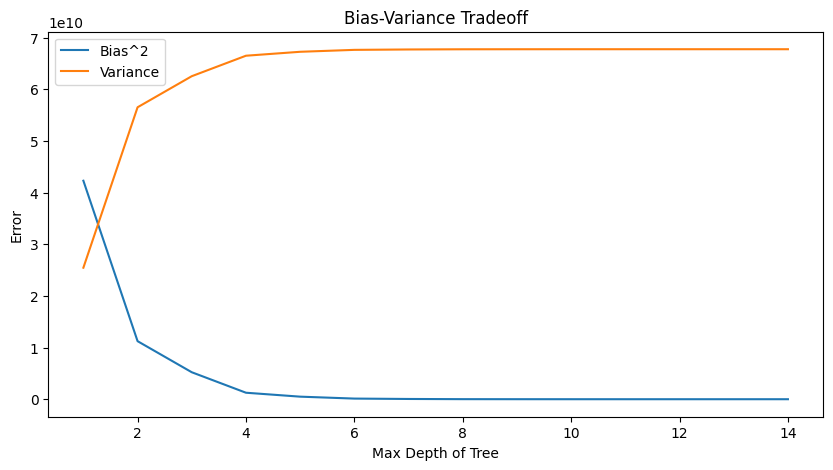

    Max Depth   MSE (Train)    MSE (Test)
0           1  4.230758e+10  5.455670e+10
1           2  1.124134e+10  1.190570e+10
2           3  5.223155e+09  5.343263e+09
3           4  1.257647e+09  1.174097e+09
4           5  4.963162e+08  5.120949e+08
5           6  1.236988e+08  1.843210e+08
6           7  4.870987e+07  7.164281e+07
7           8  1.232716e+07  2.299904e+07
8           9  5.208105e+06  1.266465e+07
9          10  1.320242e+06  9.239697e+06
10         11  4.781138e+05  8.536406e+06
11         12  1.539661e+05  8.210415e+06
12         13  6.082434e+04  8.126984e+06
13         14  1.490762e+04  8.095564e+06


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the true polynomial function
def true_function(x):
    a, b, c, d, e, f, g = 1, -1, 2, 1, 4, 2, -2
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

# Generate data
N = 1000  # Number of data points
x_values = np.random.uniform(-10, 10, N)
y = true_function(x_values)
noise = np.random.normal(0, 2, N)  # Mean 0, standard deviation 2
y_noisy = y + noise

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_noisy, test_size=0.2, random_state=42)

# Define function to calculate bias and variance
def calculate_bias_variance(model, x_train, y_train, x_test, y_test):
    y_pred_train = model.predict(x_train.reshape(-1, 1))
    y_pred_test = model.predict(x_test.reshape(-1, 1))
    bias = np.mean((y_pred_train - y_train) ** 2)
    variance = np.mean(np.var(y_pred_train))
    return bias, variance

# Varying complexity levels
max_depths = range(1, 15)
biases = []
variances = []
mse = []

# Calculate bias and variance for different complexity levels
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(x_train.reshape(-1, 1), y_train)
    bias, variance = calculate_bias_variance(model, x_train, y_train, x_test, y_test)
    biases.append(bias)
    variances.append(variance)

# Plotting bias-variance tradeoff
plt.figure(figsize=(10, 5))
plt.plot(max_depths, biases, label='Bias^2')
plt.plot(max_depths, variances, label='Variance')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


import pandas as pd

# Calculate MSE for different depths
mse_train = []
mse_test = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(x_train.reshape(-1, 1), y_train)

    # Calculate MSE for training and testing sets
    mse_train.append(mean_squared_error(y_train, model.predict(x_train.reshape(-1, 1))))
    mse_test.append(mean_squared_error(y_test, model.predict(x_test.reshape(-1, 1))))

# Create a DataFrame to store the results
mse_df = pd.DataFrame({
    'Max Depth': max_depths,
    'MSE (Train)': mse_train,
    'MSE (Test)': mse_test
})

print(mse_df)